In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# CONTEXT

### The dataset is used for this competition is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN.
### link: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data 

## Data Dictionary

| Variable	| Definition| Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex| Sex | |
| Age | Age in years | |
| sibsp| of siblings / spouses aboard the Titanic | 
| parch	| # of parents / children aboard the Titanic |	
| ticket |Ticket number	| 
| fare | Passenger fare	|
| cabin | Cabin number |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

# Data quality assessment

## Download data

In [2]:
df = pd.read_csv('train.csv', index_col = ['PassengerId'])
print(df.shape)
df.head()

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Describe data

In [3]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [4]:
# check duplicate data
df.duplicated().sum()

0

In [5]:
# check Nan values
df.apply(lambda x: f'{(x.isna().sum()*100/x.shape[0]).round(2)} %')

Survived      0.0 %
Pclass        0.0 %
Name          0.0 %
Sex           0.0 %
Age          3.29 %
SibSp         0.0 %
Parch         0.0 %
Ticket       4.62 %
Fare         0.13 %
Cabin       67.87 %
Embarked     0.25 %
dtype: object

### Comment 1. 
Feature - Cabin have a big amount of Nan values. We should not use this columns for data anlysis

# Data exploration

## Describe Age 

## 1. Compare Pclass and Survived

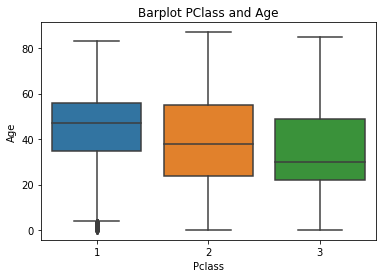

In [6]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age')
plt.title('Barplot PClass and Age')
plt.show()

###  conclusion 1. Средний возраст в каждом классе увеличивается с престижностью класса. Чем выше класс, тем выше возраст. Возможно, это связанно с доходами людей, чем выше доход, тем выше класс он может себе позволить.

conclusion 1. The average age in each class increases with class prestige. The higher the class, the higher the age. Perhaps this is due to the income of people, the higher the income, the higher the class he can afford.

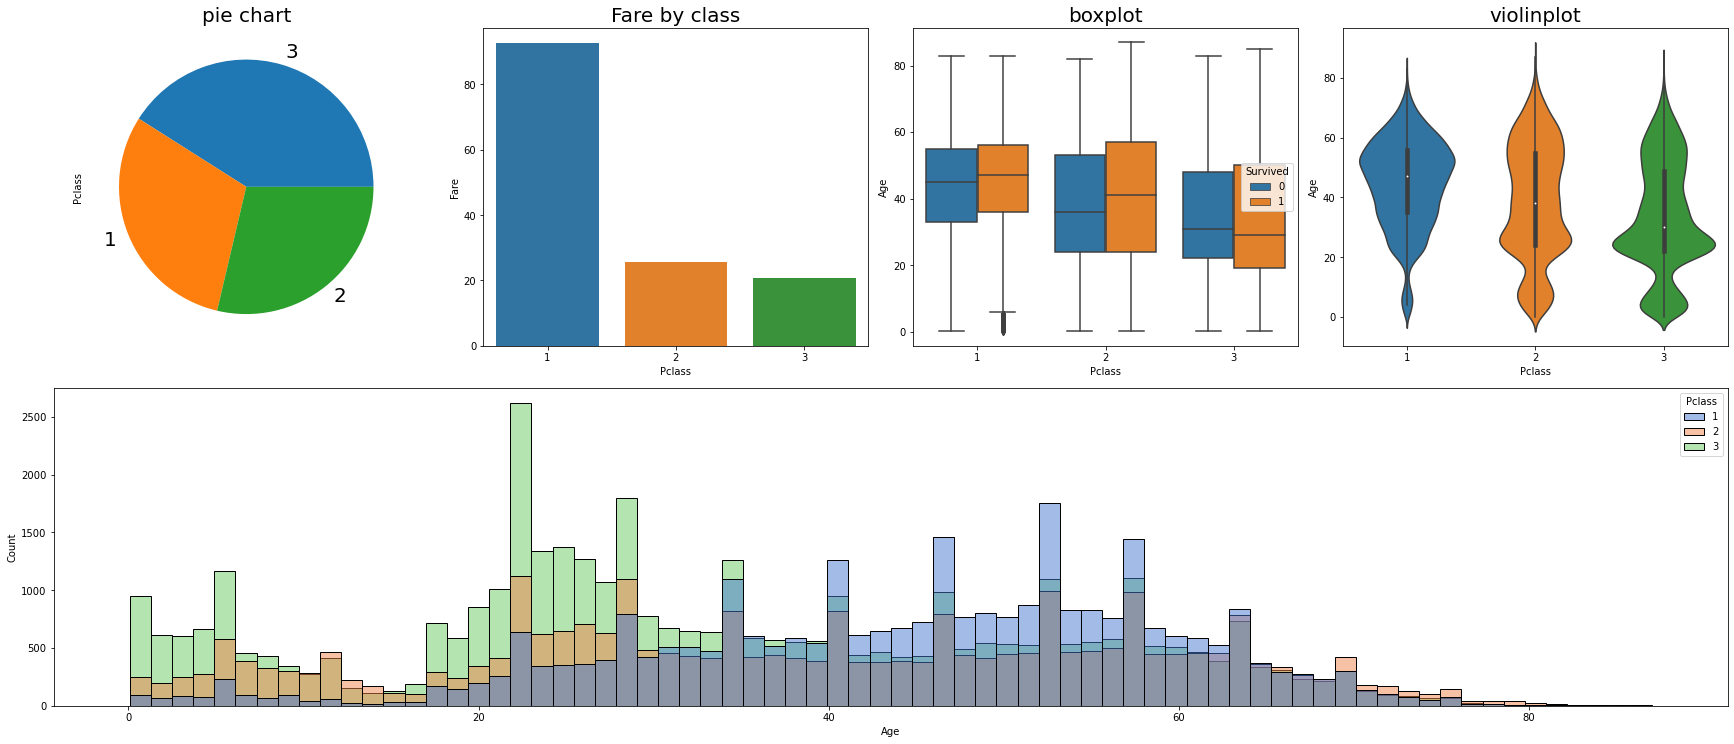

In [7]:
fig = plt.figure(figsize = (60,50))
size = (10,10)
ax1 = plt.subplot2grid(size, (0,0), colspan=1)
ax2 = plt.subplot2grid(size, (0,1), colspan=1)
ax3 = plt.subplot2grid(size, (0,2), rowspan=1)
ax4 = plt.subplot2grid(size, (0,3), colspan=1)
ax5 = plt.subplot2grid(size, (1,0), colspan=4)

cte = df.groupby('Pclass').mean().reset_index()

df['Pclass'].value_counts().plot(kind = 'pie', fontsize=20, ax = ax1)
sns.barplot(data = cte, x = 'Pclass',  y = 'Fare', ax = ax2)
sns.boxplot(data = df, x = 'Pclass', y = 'Age', ax = ax3, hue = 'Survived')
sns.violinplot(data = df, x = 'Pclass', y = 'Age', ax = ax4)
sns.histplot(data = df, x = 'Age', hue = 'Pclass', palette="muted", ax=ax5)
ax1.set_title('pie chart', fontsize=20)
ax2.set_title('Fare by class',fontsize=20)
ax3.set_title('boxplot',fontsize=20)
ax4.set_title('violinplot',fontsize=20)
fig.tight_layout()
plt.show()

In [8]:
df[['Pclass', 'Fare']].corr()

,Pclass,Fare
Pclass,1.000000,-0.417354
Fare,-0.417354,1.000000


## conclusion 2.  
### В 3 классе находилось больше людей по сравнению с другими. Возможно, это связано со стоимостью билета на этот класс (корреляция по модулю 0,41).
There were more people in the 3rd grade compared to others. Perhaps this is due to the cost of a ticket for this class (correlation modulo 0.41).
## conclusion 3.  
### У выживших людей в классах 1 и 2 средний возраст выше, чем у умерших в их же классах.
Survivors in classes 1 and 2 have a higher average age than those who die in their own classes.
## conclusion 3.  
### В 1 классе мода в возрасте в промежутке от 48 до 56 лет. ( conclusion 1) Во 2 и третьем классе наблюдается мода в возрасте от 20 до 30 лет.
In the 1st grade, fashion is between the ages of 48 and 56 years. (conclusion 1) In the 2nd and 3rd grades, fashion is observed at the age of 20 to 30 years.
## conclusion 4.  
### В 3 классе наблюдается бимодальное распределение, для этого класса характерны моды = 5-7 лет и 22-25.
In grade 3, a bimodal distribution is observed, this class is characterized by modes = 5-7 years and 22-25.

## 2. Compare Sex and Survived

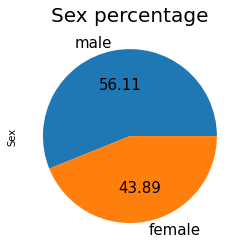

In [9]:
df['Sex'].value_counts().plot(kind = 'pie', labels = [name for name in df.Sex.unique()],
                                 autopct="%.2f", fontsize=15)
plt.title('Sex percentage',fontsize=20)
plt.show()

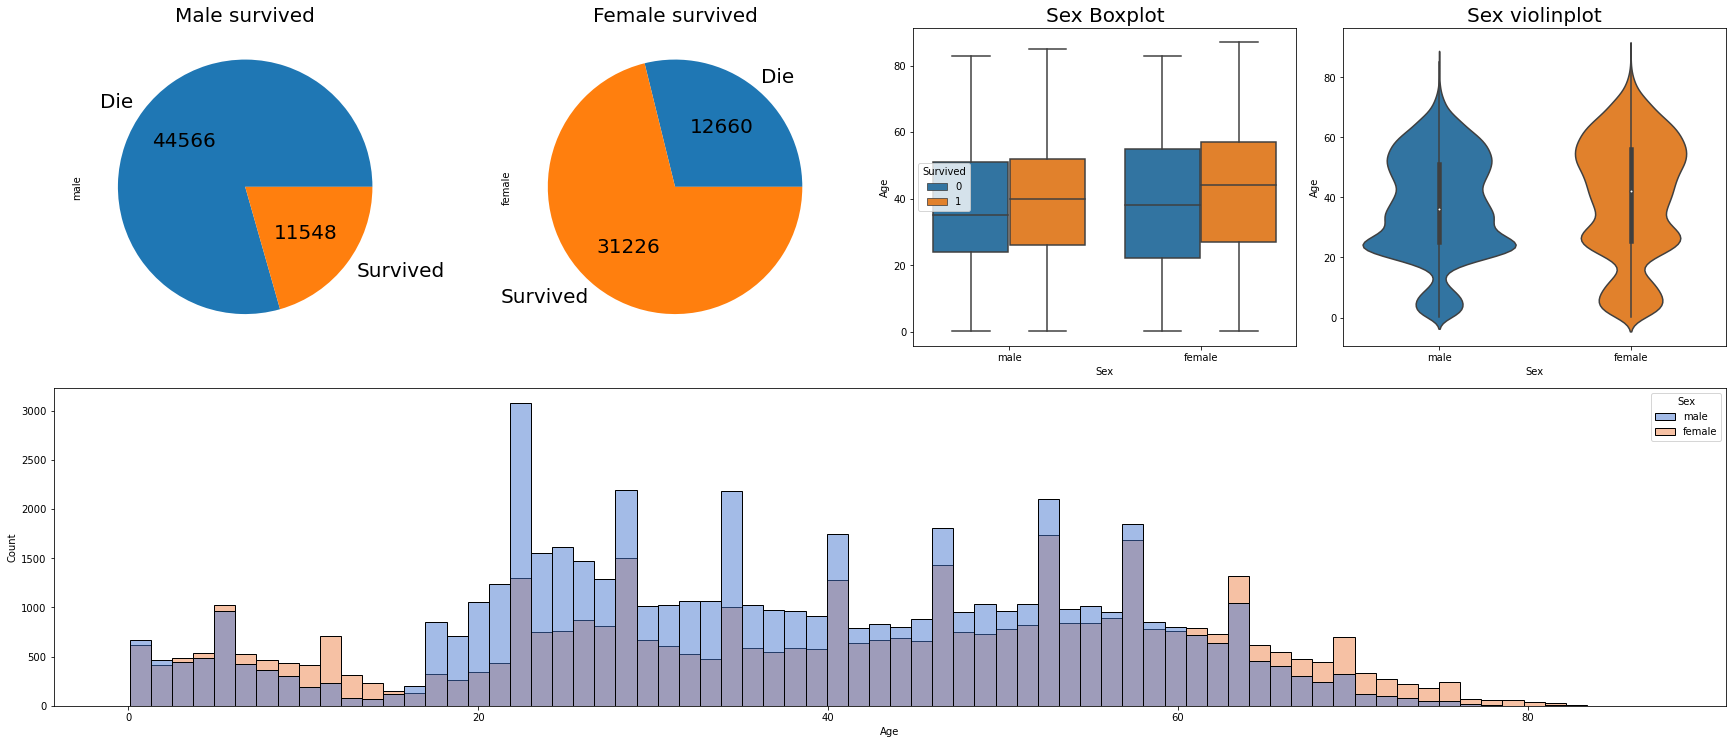

In [10]:
fig = plt.figure(figsize = (60,50))
size = (10,10)
ax1 = plt.subplot2grid(size, (0,0), colspan=1)
ax2 = plt.subplot2grid(size, (0,1), rowspan=1)
ax3 = plt.subplot2grid(size, (0,2), colspan=1)
ax4 = plt.subplot2grid(size, (0,3), colspan=1)
ax5 = plt.subplot2grid(size, (1,0), colspan=4)

cte = df.groupby('Survived')['Sex'].value_counts().unstack()
cte['male'].plot(kind = 'pie', autopct=lambda p: '{:.0f}'.format((p/100)*cte['male'].sum()), 
                 title = 'Analysis Sex and Survived',fontsize=20, labels = ['Die', 'Survived'], ax = ax1)
cte['female'].plot(kind = 'pie', autopct=lambda p: '{:.0f}'.format((p/100)*cte['female'].sum()),
                   title = 'Analysis Sex and Survived',fontsize=20, labels = ['Die', 'Survived'], ax = ax2)
sns.boxplot(data = df, x = 'Sex', y = 'Age', ax = ax3, hue = 'Survived')
sns.violinplot(data = df, x = 'Sex', y = 'Age', ax = ax4)
sns.histplot(data = df, x = 'Age', hue = 'Sex', palette="muted", ax=ax5)
ax1.set_title('Male survived',fontsize=20)
ax2.set_title('Female survived',fontsize=20)
ax3.set_title('Sex Boxplot',fontsize=20)
ax4.set_title('Sex violinplot',fontsize=20)
fig.tight_layout()
plt.show()

## conclusion 5.  
###  Мужчин было больше на борту титаника, однако женщин выжило почти в 3 раза больше.
There were more men on board the Titanic, but almost 3 times more women survived.
## conclusion 6.  
### Средний возраст выжывших превышает умерших в обоих группах.
The average age of survivors exceeds that of those who died in both groups.
## conclusion 7.  
### Гистограмма полов является бимодальным распредлением.
The sex histogram is a bimodal distribution.

## 3. Analysis Parch/SibSp and survived

In [11]:
mask_alone = df['Parch'] == 0
mask_not_alone = df['Parch'] == 0
data1 = df[mask_alone]
data2 = df[mask_not_alone]

In [12]:
cte = df.copy()
cte['parch_fl'] = [1 if i > 0 else 0 for i in df['Parch']]
cte.groupby('parch_fl').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
parch_fl,,,,,,
0,0.405208,2.130514,40.250072,0.246410,0.000000,41.173608
1,0.490363,2.041308,33.092646,0.818141,1.717914,51.590071


## conclusion 8.  
### Процент выживших кого были родственники на борту в среднем выше, чем у тех у кого не было. Это может быть свзано с тем, что люди, зная о близких на борту действовали слаженнее и менше в падали в панику
The percentage of survivors who had relatives on board was on average higher than those who did not. This may be due to the fact that people, knowing about their loved ones on board, acted more harmoniously and fell into a panic less

In [13]:
cte = df.copy()
cte['sibsp_fl'] = [1 if i > 0 else 0 for i in df['SibSp']]
cte.groupby('sibsp_fl').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
sibsp_fl,,,,,,
0,0.426843,2.166653,40.073836,0.000000,0.277637,38.796176
1,0.430204,1.942829,33.645226,1.489922,0.940469,58.025961


In [14]:
t = cte.groupby('SibSp').agg({'Survived': ['count', 'mean']})
t.columns = ['count', 'mean']
t = t.reset_index()
t

,SibSp,count,mean
0,0,73308,0.426843
1,1,19758,0.433748
2,2,3703,0.453956
3,3,1635,0.400000
4,4,1168,0.375856
5,5,132,0.189394
6,8,296,0.385135


<AxesSubplot:xlabel='SibSp', ylabel='mean'>

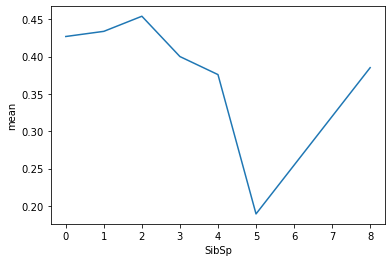

In [15]:
sns.lineplot(data = t, x = 'SibSp', y = 'mean')

## conclusion 9.  
### Мы видим, что до 3 братьев и систер в среднем выживаемость росла, однако после начала падать в связи с тем, что слишком сложно организованно и слаженно выполнять действия. Кейс с 8 количеством кажется странным и требует дополнительных исследований.
We see that up to 3 brothers and sisters, on average, survival increased, but after it began to fall due to the fact that it was too difficult to organize and coordinate actions. The case with 8 counts seems odd and needs more research.

## 4. Analysis children with 0 parch

### Some children travelled only with a nanny, therefore parch=0 for them.

In [16]:
dff = df.copy()
group1 = dff[(dff['Age'] <= 17) & (dff['Parch'] == 0)]
group2 = dff[(dff['Age'] <= 17) & (dff['Parch'] != 0)]
data= pd.concat([group1, group2])

In [17]:
data['parch_fl'] = [1 if i > 0 else 0 for i in data['Parch']]
data.groupby('parch_fl').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
parch_fl,,,,,,
0,0.400830,2.425969,9.379580,0.342482,0.000000,26.315384
1,0.458251,2.510355,5.677436,1.087719,1.635009,39.981543


## conclusion 10. 
### В среднем дети, которые были с родителями выживали больше, чем с няней. Возможно это связано с тем, что няня не могла полностью повлиять на ребенка в экстренной ситуации, как родители или же просто не хотела, т к своя жизнь дороже.
On average, children who were with their parents survived more than with a nanny. Perhaps this is due to the fact that the nanny could not fully influence the child in an emergency, like parents, or simply did not want to, because her own life is more expensive.

## 5. Analysis Embarked

In [18]:
df.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.751296,1.654978,41.850532,0.366972,0.479831,71.549073
Q,0.596976,1.461283,50.075583,0.287058,0.423304,73.385148
S,0.315294,2.294709,36.397009,0.415628,0.448939,33.200008


## conclusion 11. 
### Люди с порта С (Cherbourg) выжили в среднем выше, чем люди из остальных портов.
People from port C (Cherbourg) survived on average higher than people from other ports.

In [19]:
cte = pd.get_dummies(df['Embarked'])
cte['Survived'] = df['Survived']
cte.corr()

,C,Q,S,Survived
C,1.000000,-0.127877,-0.859231,0.349209
Q,-0.127877,1.000000,-0.385351,0.081917
S,-0.859231,-0.385351,1.000000,-0.365716
Survived,0.349209,0.081917,-0.365716,1.000000


In [20]:
cte['C'].value_counts()

0    77813
1    22187
Name: C, dtype: int64

## conclusion 12. 
### Существует высокая взаимосвязь между людьми с порта S (S = Southampton) и Выживаемостью. Исходя из conclusion 11 можно предположить, что большая часть людей с этого порта были обречены на смерть.
There is a high correlation between people from Port S (S = Southampton) and Survivability. Based on conclusion 11, it can be assumed that most of the people from this port were doomed to death.

# Summary

###  - Был проведен анализ данных модифицированных данных.
####  - Представлены 12 выводов, подкрепленными графиками, числовыми вычислениями.
### - Анализ данных показал несколько аномалий, которые требуют дальнейшего изучения.

### Data analysis of the modified data was carried out.
#### - 12 conclusions are presented, supported by graphs, numerical calculations.
### - Data analysis revealed several anomalies that require further investigation.